In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy as sp
%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [4]:
ML_A_results = pd.read_pickle('ML_A_results.pkl')
ML_2POP_results = pd.read_pickle('ML_2POP_results.pkl')

In [5]:
ML_2POP_results

,estimate,min,max
r,0.227625,0.136061,3.832547
f,0.340934,0.306108,0.375728
sigma,0.029781,0.025061,0.036192


In [6]:
LS_A_results = pd.DataFrame()

LS_A_results.loc['r', 'estimate'] = 0.0066
LS_A_results.loc['sigma', 'estimate'] = 500.0

LS_A_results

,estimate
r,0.0066
sigma,500.0000


In [7]:
LS_2POP_results = pd.DataFrame()

LS_2POP_results.loc['r', 'estimate'] = 0.12

LS_2POP_results.loc['f', 'estimate'] = 0.35
LS_2POP_results.loc['f', 'min'] = 0.12
LS_2POP_results.loc['f', 'max'] = 0.63

LS_2POP_results.loc['sigma', 'estimate'] = 500.0

LS_2POP_results

,estimate,min,max
r,0.12,NaN,NaN
f,0.35,0.12,0.63
sigma,500.00,NaN,NaN


In [8]:
for data in [ML_A_results, ML_2POP_results, LS_2POP_results]:
    data['err_down'] = data['estimate'] - data['min']
    data['err_up'] = - (data['estimate'] - data['max'])

In [70]:
ax2POPf.bar?

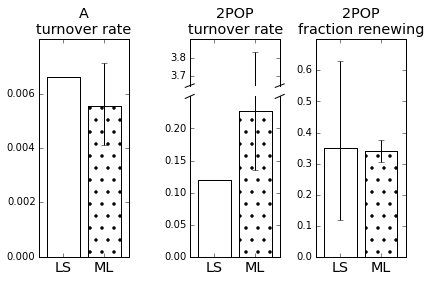

In [73]:
fig = plt.figure()

axAr =    plt.subplot2grid((1,16), (0,0), colspan = 5)
ax2POPr_up = plt.subplot2grid((100,16), (0,6), colspan = 5, rowspan = 25)
ax2POPr_down = plt.subplot2grid((100,16), (25,6), colspan = 5, rowspan = 75)
ax2POPf = plt.subplot2grid((1,16), (0,11), colspan = 5)

locations = sp.array([1, 2])
labels = ['LS', 'ML']
width = 0.8

for axes in [axAr, ax2POPr_up, ax2POPr_down, ax2POPf]:
    axes.set_xticks(locations + width / 2.0)
    axes.set_xticklabels(labels, fontsize = 'x-large')
    axes.set_xlim(width, 3)
    continue

plotargs = {'color': 'white',
            'width': 0.8,
            'ecolor': 'black'}

axAr.set_title('A\nturnover rate', fontsize = 'x-large')
axAr.set_ylim(0.0, 0.008)
axAr.set_yticks(sp.linspace(0, 0.008, 4, endpoint = False))
axAr.bar(1, LS_A_results['estimate']['r'], **plotargs)
axAr.bar(2, ML_A_results['estimate']['r'], hatch = '.', yerr = [[[ML_A_results['err_down']['r']]], [ML_A_results['err_up']['r']]], **plotargs)


# ax2POPr.set_ylabel("$\quad$", fontsize = 'x-large')

ax2POPr_up.set_title('2POP\nturnover rate', fontsize = 'x-large')
ax2POPr_up.set_ylim(3.65, 3.9)
ax2POPr_up.set_yticks([3.7, 3.8])
ax2POPr_up.spines['bottom'].set_visible(False)
ax2POPr_up.xaxis.tick_top()
ax2POPr_up.tick_params(labeltop='off')
ax2POPr_up.bar(1, LS_2POP_results['estimate']['r'], **plotargs)
ax2POPr_up.bar(2, ML_2POP_results['estimate']['r'], hatch = '.', yerr = [[ML_2POP_results['err_down']['r']], [ML_2POP_results['err_up']['r']]], **plotargs)


ax2POPr_down.spines['top'].set_visible(False)
ax2POPr_down.xaxis.tick_bottom()
ax2POPr_down.set_ylim(0, 0.25)
ax2POPr_down.set_yticks(sp.linspace(0, 0.25, 5, endpoint = False))
ax2POPr_down.bar(1, LS_2POP_results['estimate']['r'], **plotargs)
ax2POPr_down.bar(2, ML_2POP_results['estimate']['r'], hatch = '.', yerr = [[ML_2POP_results['err_down']['r']], [ML_2POP_results['err_up']['r']]], **plotargs)

d = .05 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax2POPr_up.transAxes, color='k', clip_on=False)
ax2POPr_up.plot((-d,+d),(-d*0.75,d*0.75), **kwargs)      # top-left diagonal
ax2POPr_up.plot((1-d,1+d),(-d*0.75,d*0.75), **kwargs)    # top-right diagonal

kwargs.update(transform=ax2POPr_down.transAxes)  # switch to the bottom ax2POPr_up.s
ax2POPr_down.plot((-d,+d),(1-d*0.25,1+d*0.25), **kwargs)   # bottom-left diagonal
ax2POPr_down.plot((1-d,1+d),(1-d*0.25,1+d*0.25), **kwargs) # bottom-right diagonal

ax2POPf.set_title('2POP\nfraction renewing', fontsize = 'x-large')
ax2POPf.set_ylim(0, 0.7)
ax2POPf.set_yticks(sp.linspace(0, 0.7, 7, endpoint = False))
ax2POPf.bar(1, LS_2POP_results['estimate']['f'], yerr = [[LS_2POP_results['err_down']['f']], [LS_2POP_results['err_up']['f']]], **plotargs)
ax2POPf.bar(2, ML_2POP_results['estimate']['f'], hatch = '.', yerr = [[ML_2POP_results['err_down']['f']], [ML_2POP_results['err_up']['f']]], **plotargs)

plt.tight_layout()

plt.savefig('parameter_comparison_LS_ML.png', dpi = 300)

plt.show()

In [118]:
plt.subplot2grid?